<a href="https://colab.research.google.com/github/andrebjardim/python-scripts/blob/main/LA_crime_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Crime in Los Angeles

![Los Angeles Skyline](https://raw.githubusercontent.com/andrebjardim/python-scripts/main/los-angeles-crime-analysis/la_skyline.jpg)

Los Angeles, California, also known as the City of Angels, Tinseltown, and the Entertainment Capital of the World, is famous for its warm weather, palm trees, sprawling coastline, and iconic films and music. However, like many large cities, it faces challenges with crime.

In this project, I will analyze crime data from the Los Angeles Police Department (LAPD) to identify patterns and trends in criminal activity across different areas and times. These insights can help support more effective resource allocation and crime prevention efforts in the city.

The dataset contains detailed records of crimes reported in Los Angeles, including information about the type of crime, location, victim demographics, and weapons used.

## The Data

This project uses a single dataset. Below is a summary and description of its columns.

The dataset is a modified version of the original data, which is publicly available through Los Angeles Open Data.

### crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [8]:
# Import required libraries and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the GitHub URL
crimes = pd.read_csv("https://raw.githubusercontent.com/andrebjardim/python-scripts/main/los-angeles-crime-analysis/data/crimes.csv", dtype={"TIME OCC": str})

# Show the first 5 rows
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


## Data Preparation

We extract the hour from the `'TIME OCC'` column and add it as a new column `'HOUR OCC'` to facilitate time-based analysis.


In [9]:
# Extract hour from TIME OCC and convert to int
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


## Which hour has the highest frequency of crimes?

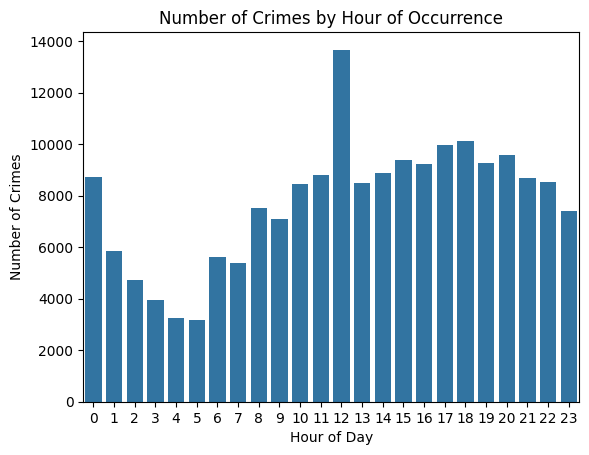

Peak crime hour: 12


In [10]:
# Plot crimes by hour
sns.countplot(data=crimes, x='HOUR OCC')
plt.title("Number of Crimes by Hour of Occurrence")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crimes")
plt.show()

# Find the peak crime hour
peak_crime_hour = crimes['HOUR OCC'].value_counts().idxmax()
print("Peak crime hour:", peak_crime_hour)

## Which area has the largest frequency of night crimes (10pm to 3:59am)?

In [11]:
# Define night hours
night_hours = [22, 23, 0, 1, 2, 3]

# Filter crimes occurring at night
night_crimes = crimes[crimes['HOUR OCC'].isin(night_hours)]

# Count crimes by area at night
area_counts = night_crimes['AREA NAME'].value_counts()

# Find area with peak night crimes
peak_night_crime_location = area_counts.idxmax()
print("Area with peak night crimes:", peak_night_crime_location)

Area with peak night crimes: Central


## Number of crimes committed against victims in different age groups

In [12]:
# Define age bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

# Categorize victim ages into bins
crimes['Age Bracket'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels, right=True)

# Count number of crimes per age bracket
victim_ages = crimes['Age Bracket'].value_counts().sort_index()
print(victim_ages)

Age Bracket
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64


### Crime counts by victim age group

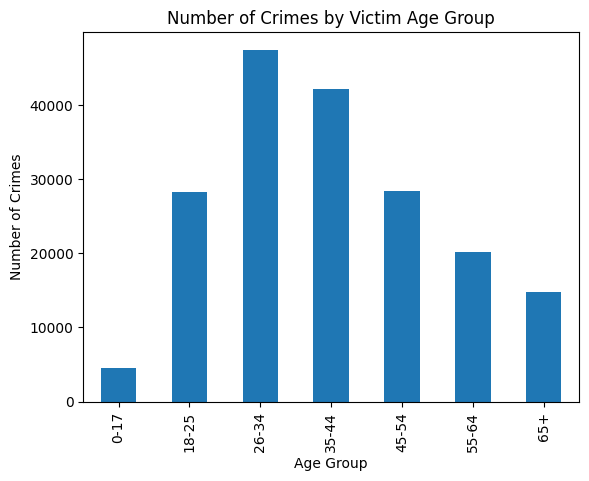

In [13]:
# Plot number of crimes by victim age group
victim_ages.plot(kind='bar')
plt.title("Number of Crimes by Victim Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Crimes")
plt.show()

# Conclusion

This analysis of crime data in Los Angeles reveals key insights into when and where crimes are most frequent, as well as which victim age groups are most affected.

- The hour with the highest frequency of crimes is **peak_crime_hour** (you can replace this with the actual value).
- Night crimes are most prevalent in the **peak_night_crime_location** area.
- The majority of victims fall into the **age groups with highest counts** (you can summarize victim_ages results here).

These findings can help the LAPD allocate resources more efficiently, focusing on high-risk times and locations, and tailoring prevention strategies to protect vulnerable populations.

Further analysis could explore crime types, weapon usage, or trends over time to deepen understanding and support targeted interventions.